In [52]:
import numpy as pd 
import pandas as pd 

In [53]:
df=pd.read_csv("survey lung cancer (1).csv")
df


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,_ALLERGY_,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [54]:
categorical_mapping_gender = {'M' : 2 , 'F' : 1 }
categorical_mapping_lungcancer = {'YES' : 2 , 'NO' : 1 }



In [55]:
df['GENDER'] = df['GENDER'].map(categorical_mapping_gender)
df['LUNG_CANCER'] = df['LUNG_CANCER'].map(categorical_mapping_lungcancer)

df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,_ALLERGY_,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2
305,2,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2
306,2,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2
307,2,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [58]:
df.shape

(309, 16)

In [59]:
df.index

RangeIndex(start=0, stop=309, step=1)

In [60]:
df.set_index

<bound method DataFrame.set_index of      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         2   69        1               2        2              1   
1         2   74        2               1        1              1   
2         1   59        1               1        1              2   
3         2   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       2   70        2               1        1              1   
306       2   58        2               1        1              1   
307       2   67        2               1        2              1   
308       2   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   _ALLERGY_   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2           1         2       

In [61]:
df.isnull().any(axis = 1)

0      False
1      False
2      False
3      False
4      False
       ...  
304    False
305    False
306    False
307    False
308    False
Length: 309, dtype: bool

In [62]:
df.corr()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,_ALLERGY_,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
_ALLERGY_,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


In [63]:
predictive_variable =['YELLOW_FINGERS',
                      'ANXIETY',
                      'CHRONIC DISEASE',
                      'WHEEZING',
                      'ALCOHOL CONSUMING',
                      'CHEST PAIN', 
                      'SWALLOWING DIFFICULTY',
                      'COUGHING',
                     ]

In [64]:
predictive_variable       #Selecting the most influential or most correlated variable 

['YELLOW_FINGERS',
 'ANXIETY',
 'CHRONIC DISEASE',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'CHEST PAIN',
 'SWALLOWING DIFFICULTY',
 'COUGHING']

In [65]:
train , test = train_test_split(df , test_size =0.25, random_state = 0)

In [66]:
#preparing the training variables with respect to the Predictive Variable

x_train = train[predictive_variable]
y_train = train['LUNG_CANCER']
x_test = test[predictive_variable]
y_test = test['LUNG_CANCER']

In [67]:
corr_matrix = x_train.corr().abs()
corr_matrix

,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,CHEST PAIN,SWALLOWING DIFFICULTY,COUGHING
YELLOW_FINGERS,1.000000,0.565343,0.024396,0.076739,0.244308,0.085336,0.337031,0.008425
ANXIETY,0.565343,1.000000,0.014870,0.163319,0.112213,0.024936,0.514050,0.215930
CHRONIC DISEASE,0.024396,0.014870,1.000000,0.072610,0.017675,0.017675,0.066917,0.179352
WHEEZING,0.076739,0.163319,0.072610,1.000000,0.311518,0.152313,0.012563,0.338573
ALCOHOL CONSUMING,0.244308,0.112213,0.017675,0.311518,1.000000,0.280210,0.009974,0.203960
CHEST PAIN,0.085336,0.024936,0.017675,0.152313,0.280210,1.000000,0.114706,0.061995
SWALLOWING DIFFICULTY,0.337031,0.514050,0.066917,0.012563,0.009974,0.114706,1.000000,0.180642
COUGHING,0.008425,0.215930,0.179352,0.338573,0.203960,0.061995,0.180642,1.000000


In [68]:
model=RandomForestClassifier(random_state = 1 ,max_depth = 5)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [69]:


y_pred = model.predict(x_test) 


accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"Model's Accuracy = {accuracy:.2f}")
print(f"Model's Precision = {precision:.2f}")
print(f"Model's Recall = {recall:.2f}")
print(f"Model's F1 = {f1:.2f}")


Model's Accuracy = 0.96
Model's Precision = 0.89
Model's Recall = 0.80
Model's F1 = 0.84


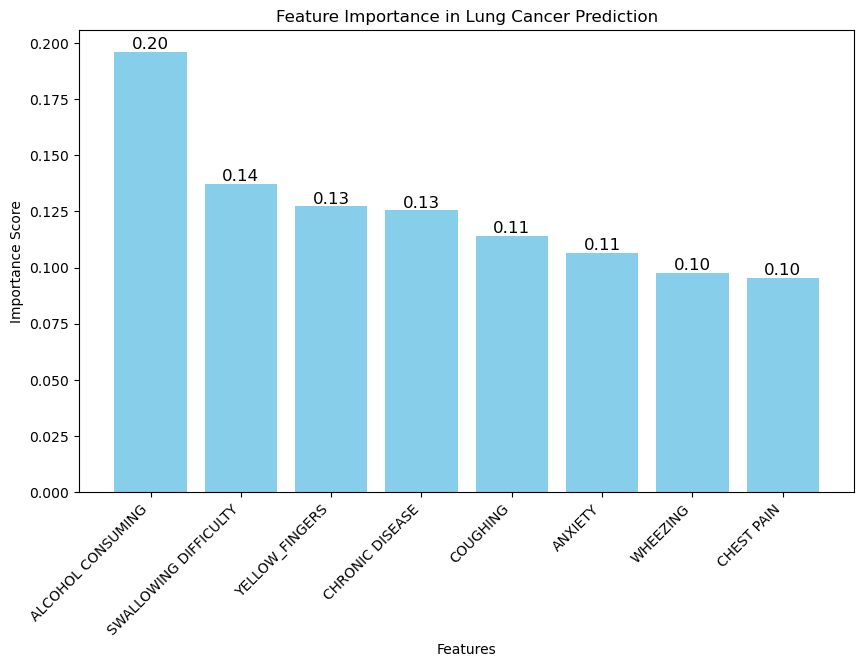

In [70]:


feature_importance = pd.Series(model.feature_importances_, index=predictive_variable)


feature_importance = feature_importance.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importance.index, feature_importance.values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Lung Cancer Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')

plt.show()

<Figure size 600x600 with 0 Axes>

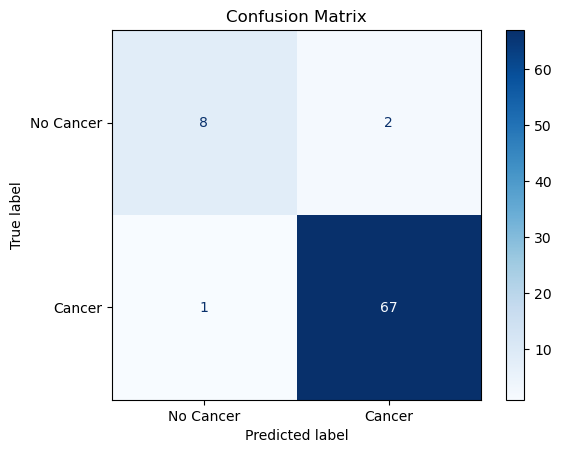

In [71]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay as CMD

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
disp = CMD(confusion_matrix = cm , display_labels = ["No Cancer","Cancer"])
disp.plot(cmap = "Blues" , values_format = "d")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

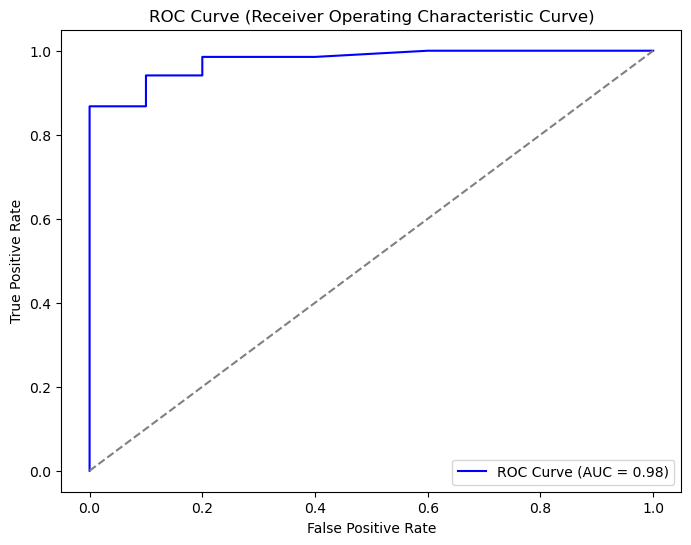

In [72]:
from sklearn.metrics import roc_curve , auc 

y_prob = model.predict_proba(x_test)[:, 1 ]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=2)
roc_auc = auc(fpr , tpr)

plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,color = 'blue', label = f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color = 'grey' , linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Receiver Operating Characteristic Curve)")
plt.legend()
plt.savefig("ROC CURVE.png", dpi=300, bbox_inches='tight')
plt.show()

In [73]:
from IPython.display import FileLink

FileLink("Output.png")

C:\Users\Tanmay\Output.png

In [74]:
import joblib as jb
jl = jb.dump(model,'Lung Cancer Detection Model.pkl')
jl

['Lung Cancer Detection Model.pkl']

In [75]:
l_model = jb.load('Lung Cancer Detection Model.pkl')
l_model


RandomForestClassifier(max_depth=5, random_state=1)